In [1]:
state = "New York"

In [2]:
import pandas as pd
from plotnine import ggplot, aes, geom_col, coord_flip, labs, theme_minimal
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv("/Users/kopo/Documents/pycon_africa/acs2017_county_data.csv")
data.describe()

,CountyId,TotalPop,Men,Women,Hispanic,White,Black,Native,Asian,Pacific,...,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
count,3220.000000,3.220000e+03,3.220000e+03,3.220000e+03,3220.000000,3220.000000,3220.000000,3220.000000,3220.000000,3220.000000,...,3220.000000,3220.000000,3220.000000,3220.000000,3.220000e+03,3220.000000,3220.000000,3220.000000,3220.000000,3220.000000
mean,31393.605280,1.007681e+05,4.958781e+04,5.118032e+04,11.296584,74.920186,8.681957,1.768416,1.289379,0.083416,...,3.244472,1.598696,4.736894,23.474534,4.709295e+04,74.863323,17.086118,7.772733,0.278820,6.665590
std,16292.078954,3.244996e+05,1.593212e+05,1.652164e+05,19.342522,23.056700,14.333571,7.422946,2.716191,0.709277,...,3.891510,1.678232,3.073484,5.687241,1.558159e+05,7.647916,6.390868,3.855454,0.448073,3.772612
min,1001.000000,7.400000e+01,3.900000e+01,3.500000e+01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,5.100000,3.900000e+01,31.100000,4.400000,0.000000,0.000000,0.000000
25%,19032.500000,1.121350e+04,5.645500e+03,5.553500e+03,2.100000,63.500000,0.600000,0.100000,0.200000,0.000000,...,1.400000,0.800000,2.900000,19.600000,4.573000e+03,71.200000,12.700000,5.200000,0.100000,4.475000
50%,30024.000000,2.584750e+04,1.287900e+04,1.299350e+04,4.100000,83.600000,2.000000,0.300000,0.600000,0.000000,...,2.300000,1.300000,4.100000,23.200000,1.061150e+04,76.100000,15.900000,6.800000,0.200000,6.100000
75%,46105.500000,6.660825e+04,3.301725e+04,3.359375e+04,10.000000,92.800000,9.500000,0.600000,1.200000,0.100000,...,3.825000,1.900000,5.800000,27.000000,2.874725e+04,80.200000,19.900000,9.200000,0.300000,8.000000
max,72153.000000,1.010572e+07,4.979641e+06,5.126081e+06,100.000000,100.000000,86.900000,90.300000,41.800000,33.700000,...,59.200000,43.200000,33.000000,45.100000,4.805817e+06,88.800000,64.800000,38.000000,8.000000,40.900000


In [4]:
print("Columns available:", list(data.columns))

Columns available: ['CountyId', 'State', 'County', 'TotalPop', 'Men', 'Women', 'Hispanic', 'White', 'Black', 'Native', 'Asian', 'Pacific', 'VotingAgeCitizen', 'Income', 'IncomeErr', 'IncomePerCap', 'IncomePerCapErr', 'Poverty', 'ChildPoverty', 'Professional', 'Service', 'Office', 'Construction', 'Production', 'Drive', 'Carpool', 'Transit', 'Walk', 'OtherTransp', 'WorkAtHome', 'MeanCommute', 'Employed', 'PrivateWork', 'PublicWork', 'SelfEmployed', 'FamilyWork', 'Unemployment']


In [5]:
state_data = data[data["State"] == state]
print(f"Number of counties in {state}: {len(state_data)}")

Number of counties in New York: 62


In [6]:
total_population = state_data["TotalPop"].sum()
mean_population = state_data["TotalPop"].mean()
largest_county_row = state_data.loc[state_data["TotalPop"].idxmax()]
largest_county = largest_county_row["County"]
largest_county_pop = largest_county_row["TotalPop"]

In [7]:
print(f"Rows found for {state}: {len(state_data)}")

Rows found for New York: 62


In [8]:
print(f"Total population (2017): {total_population:,.0f}")
print(f"Average county population: {mean_population:,.0f}")
print(f"Largest county: {largest_county} ({largest_county_pop:,.0f} people)")

Total population (2017): 19,798,228
Average county population: 319,326
Largest county: Kings County (2,635,121 people)


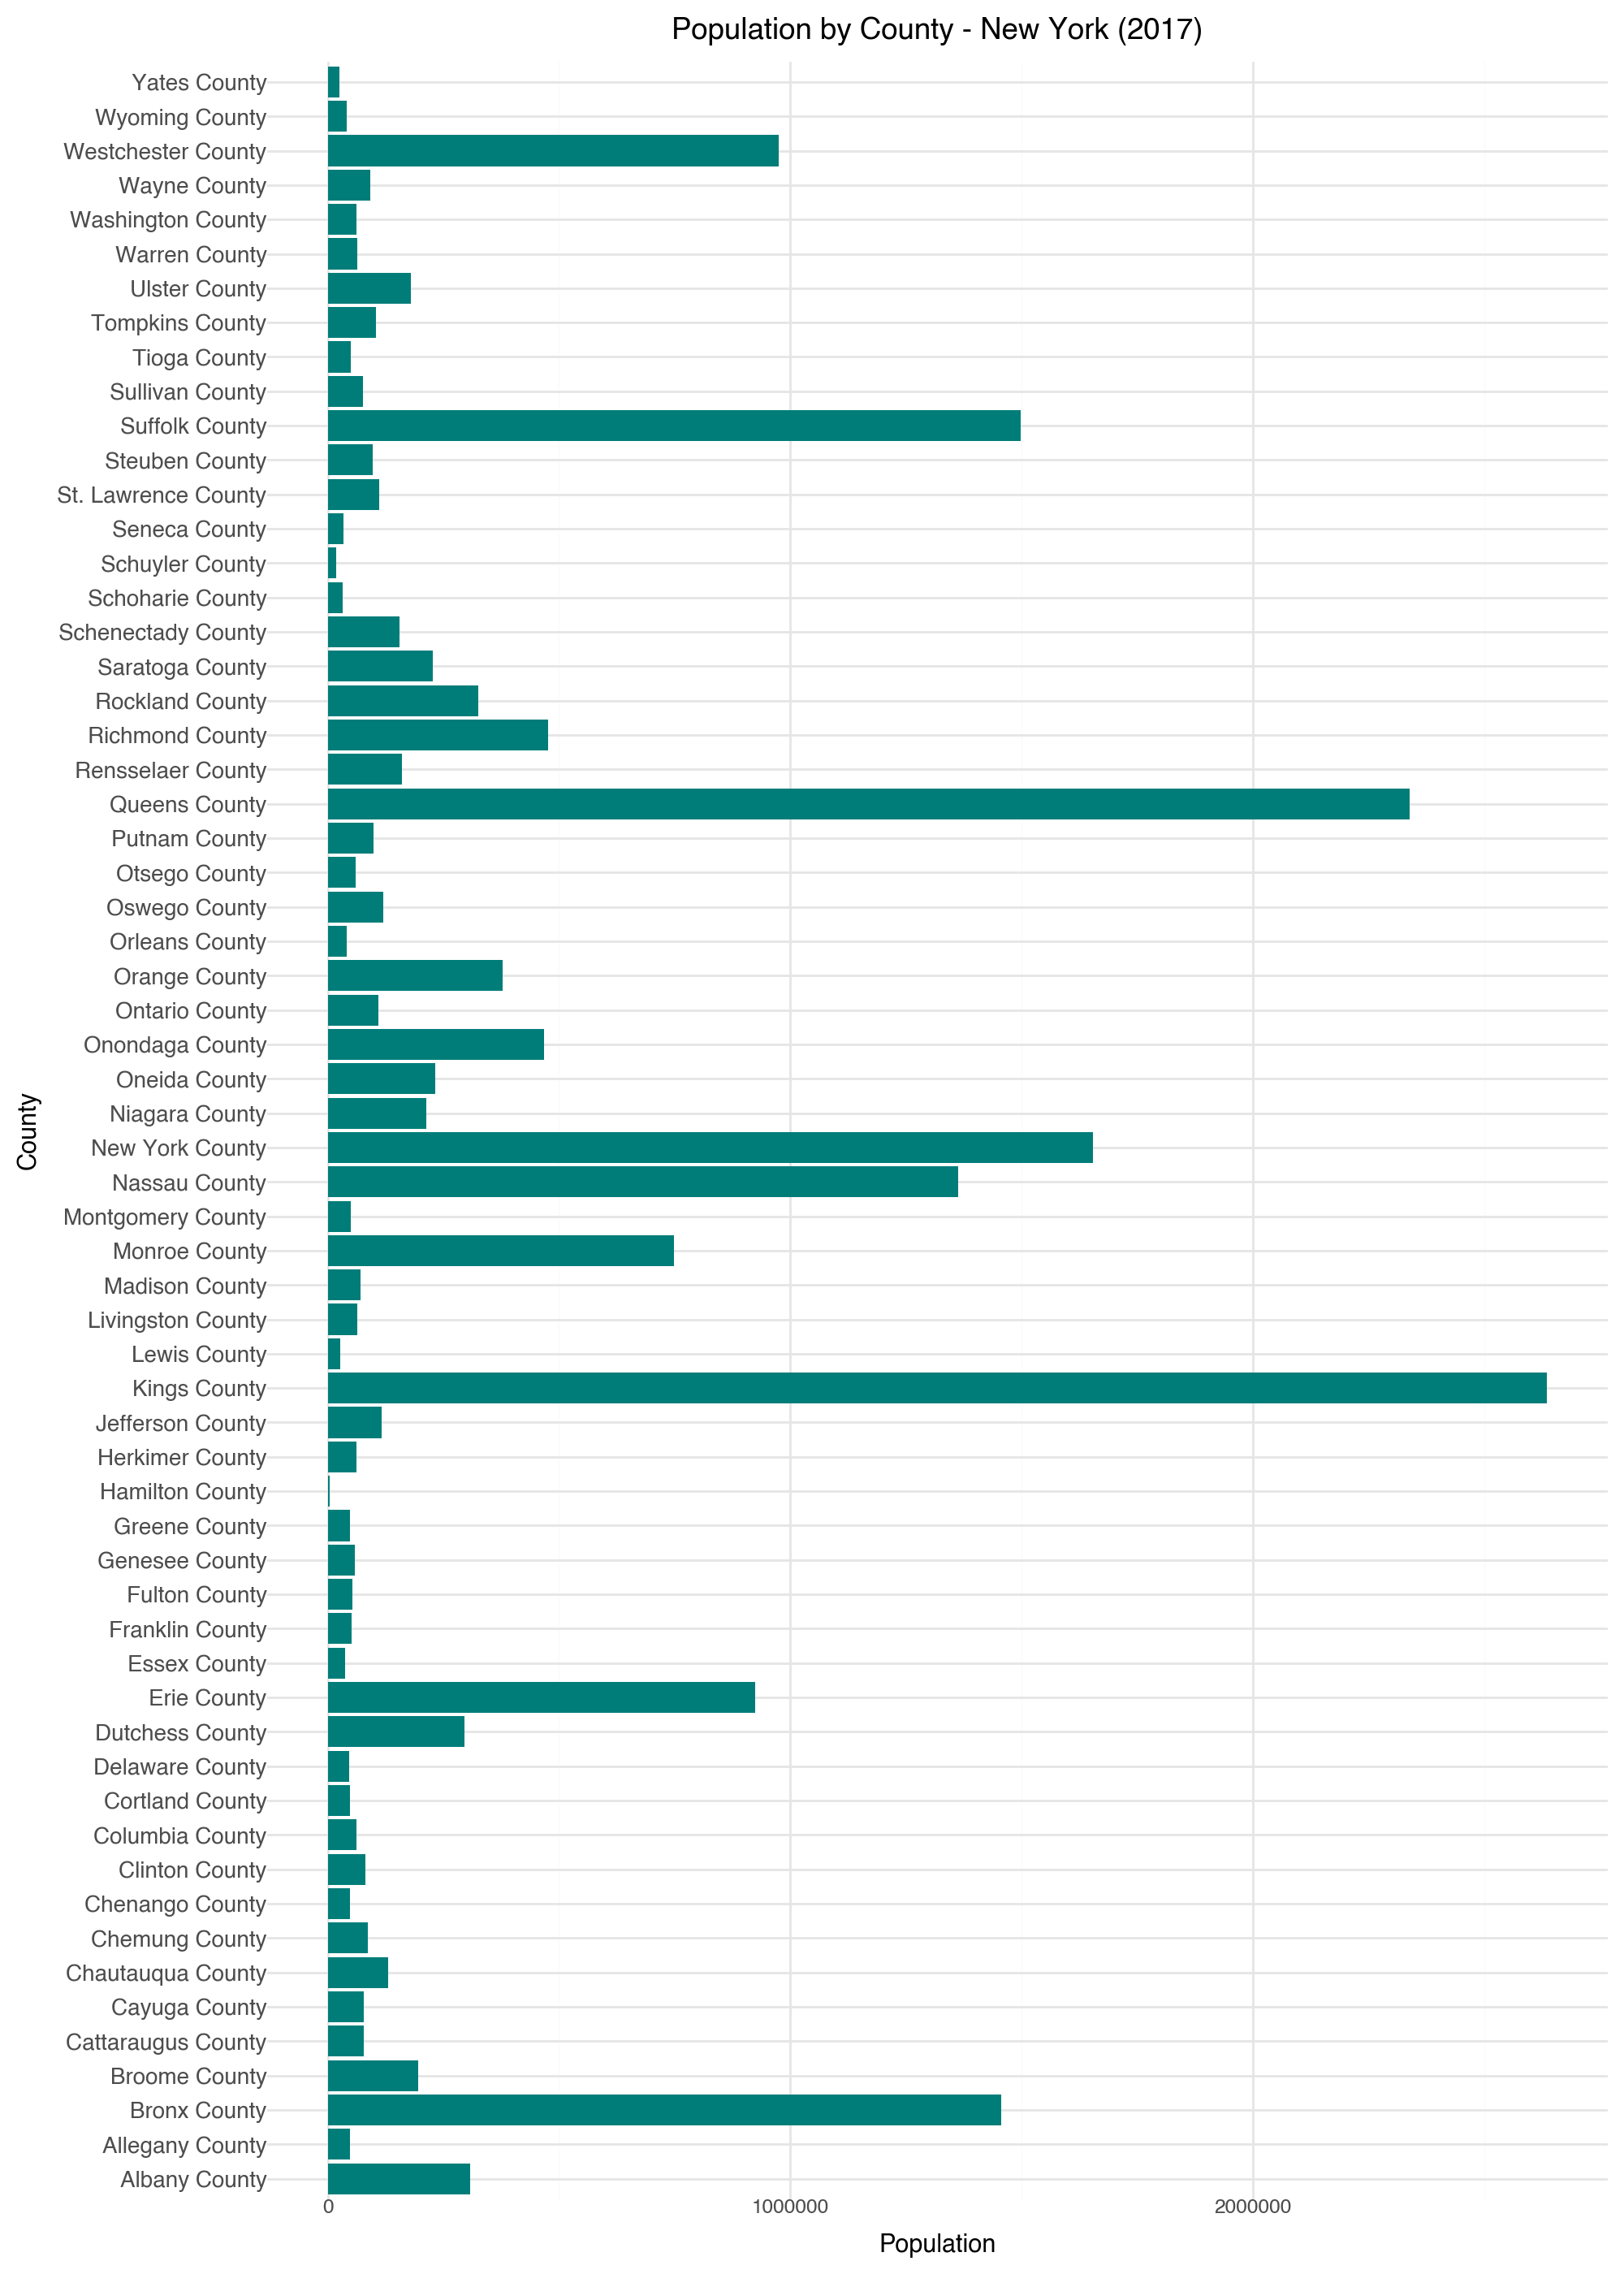

In [9]:
from plotnine import theme, element_text

(
    ggplot(state_data.sort_values("TotalPop"), aes(x="County", y="TotalPop")) +
    geom_col(fill="#007d79") +
    coord_flip() +
    labs(
        title=f"Population by County - {state} (2017)",
        x="County",
        y="Population"
    ) +
    theme_minimal() +
    theme(
        figure_size=(10, 14),      # make plot taller
        axis_text_y=element_text(size=10)  # smaller county names
    )
)


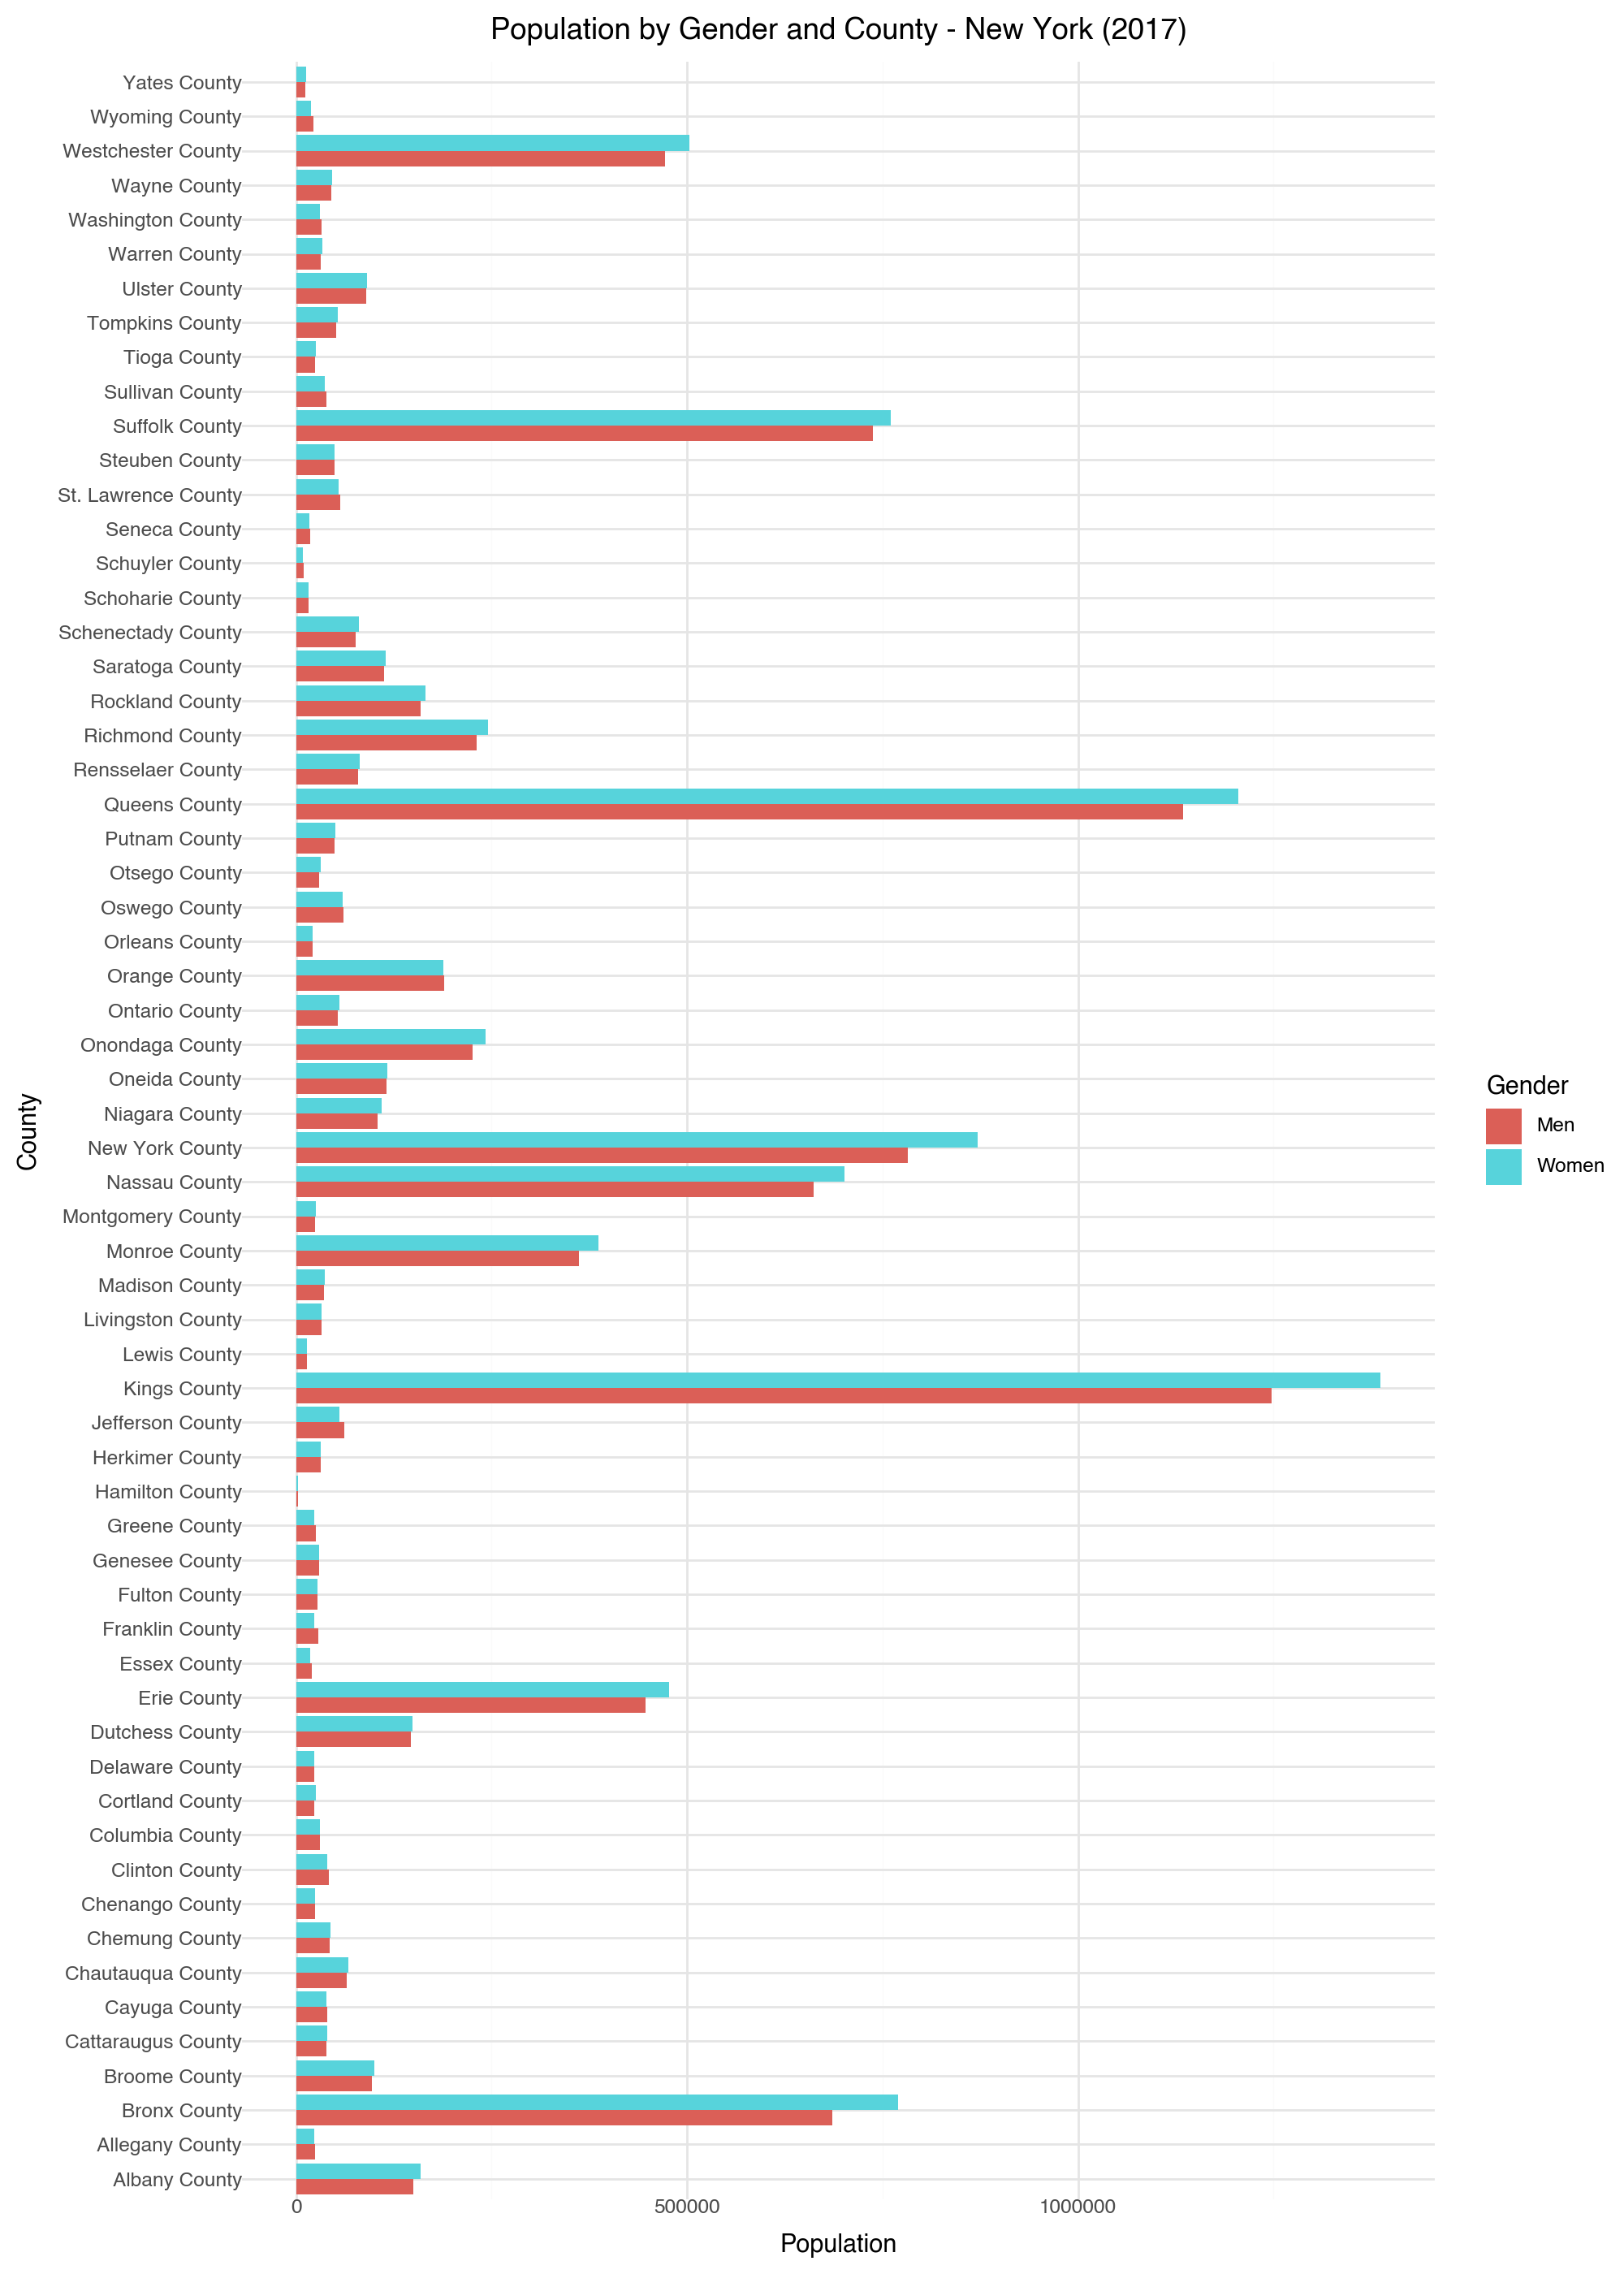

In [10]:
from plotnine import ggplot, aes, geom_col, coord_flip, labs, theme_minimal, theme, position_dodge

gender_data = state_data.melt(
    id_vars=["County"],
    value_vars=["Men", "Women"],
    var_name="Gender",
    value_name="Count"
)

(
    ggplot(gender_data, aes(x="County", y="Count", fill="Gender")) +
    geom_col(position=position_dodge()) +
    coord_flip() +
    labs(
        title=f"Population by Gender and County - {state} (2017)",
        x="County",
        y="Population"
    ) +
    theme_minimal() +
    theme(figure_size=(10, 14))
)


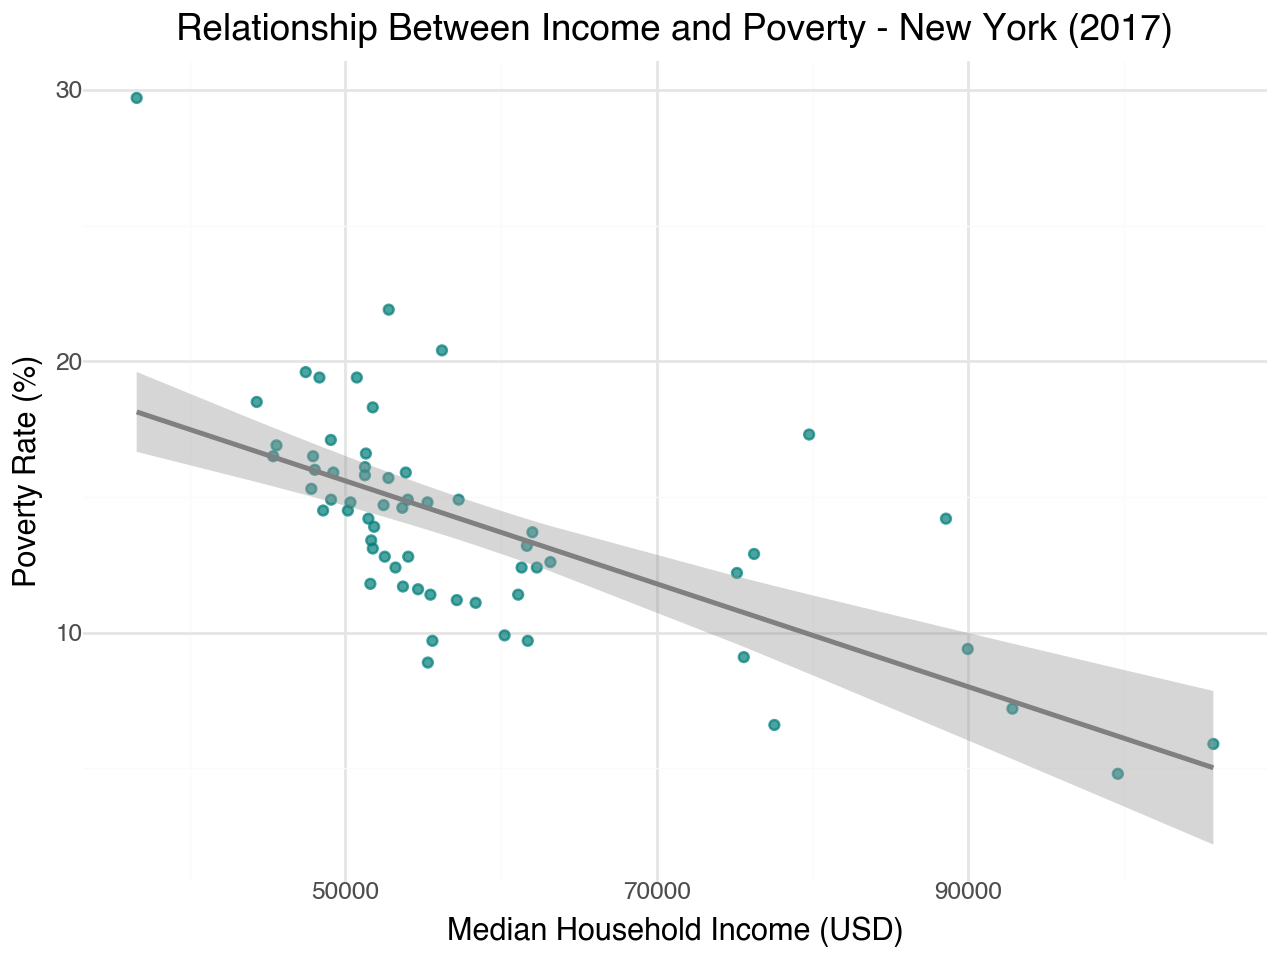

In [11]:
from plotnine import ggplot, aes, geom_point, labs, theme_minimal, geom_smooth

(
    ggplot(state_data, aes(x="Income", y="Poverty")) +
    geom_point(color="#007d79", alpha=0.7) +
    labs(
        title=f"Relationship Between Income and Poverty - {state} (2017)",
        x="Median Household Income (USD)",
        y="Poverty Rate (%)"
    ) +
    theme_minimal() +
    geom_smooth(method='lm', color='gray')
)


In [12]:
summary = (
    f"In 2017, {state} had a total population of {total_population:,.0f}, "
    f"with an average county population of {mean_population:,.0f}. "
    f"The most populous county was {largest_county} with {largest_county_pop:,.0f} residents."
)
print(summary)

In 2017, New York had a total population of 19,798,228, with an average county population of 319,326. The most populous county was Kings County with 2,635,121 residents.
